#Import Library 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import metrics

#Analyze Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/habib238/My-DigitalSkola/main/Dataset_11%20-%20Healthcare%20.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Features (Data Dictionary)

**1.** age - age in years

**2.** sex - (1 = male; 0 = female)

**3.** cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

**4.** trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

**5.** chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern

**6.** fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes

**7.** restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
  * can range from mild symptoms to severe problems
  * signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
  * Enlarged heart's main pumping chamber

**8.** thalach - maximum heart rate achieved

**9.** exang - exercise induced angina (1 = yes; 0 = no)

**10.** oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**11.** slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

**12.** ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

**13.** thal - thalium stress result
* 1: normal
* 2: fixed defect: used to be defect but ok now
* 3: reversable defect: no proper blood movement when excercising

**14.** target - have disease or not (1=yes, 0=no) (= the predicted attribute)

 ## Exploratory & Visualization Data Analyst



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
data.shape

(303, 14)

Data memiliki 303 baris dan 14 kolom

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Data Target

In [ ]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Heart Disease Count')

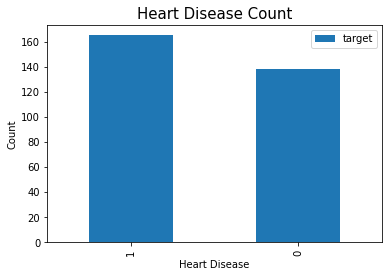

In [ ]:
data_target= pd.DataFrame(data.target.value_counts())
data_target.plot(kind='bar')
plt.xlabel('Heart Disease');
plt.ylabel('Count')
plt.title("Heart Disease Count", fontsize=15)

Text(0.5, 1.0, 'Heart Disease Count')

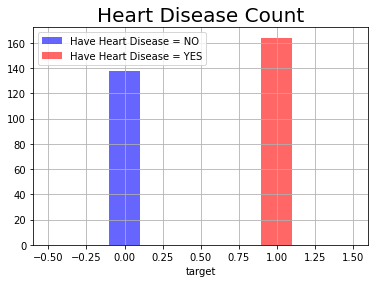

In [38]:
data[data["target"] == 0][column].hist(bins=5, color='blue', label='Have Heart Disease = NO', alpha=0.6)
data[data["target"] == 1][column].hist(bins=5, color='red', label='Have Heart Disease = YES', alpha=0.6)
plt.legend()
plt.xlabel(column)
plt.title("Heart Disease Count", fontsize=20)

Dapat disimpulkan bahwa person with heart disease = 165 dan person without heart disease= 138

###Mengecek Missing Values

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dapat dilihat bahwa tidak ada data null, sehingga data sudah dikatakan bersih.

###Mengecek Data Duplicated

In [ ]:
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.duplicated().sum()

0

###Mengecek Data Unique

In [ ]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Data Kategorik & Data Numerik (Kontinu)

In [ ]:
#Membedakan data yang kategorik dan kontinu
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

#### Data Kategorik

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

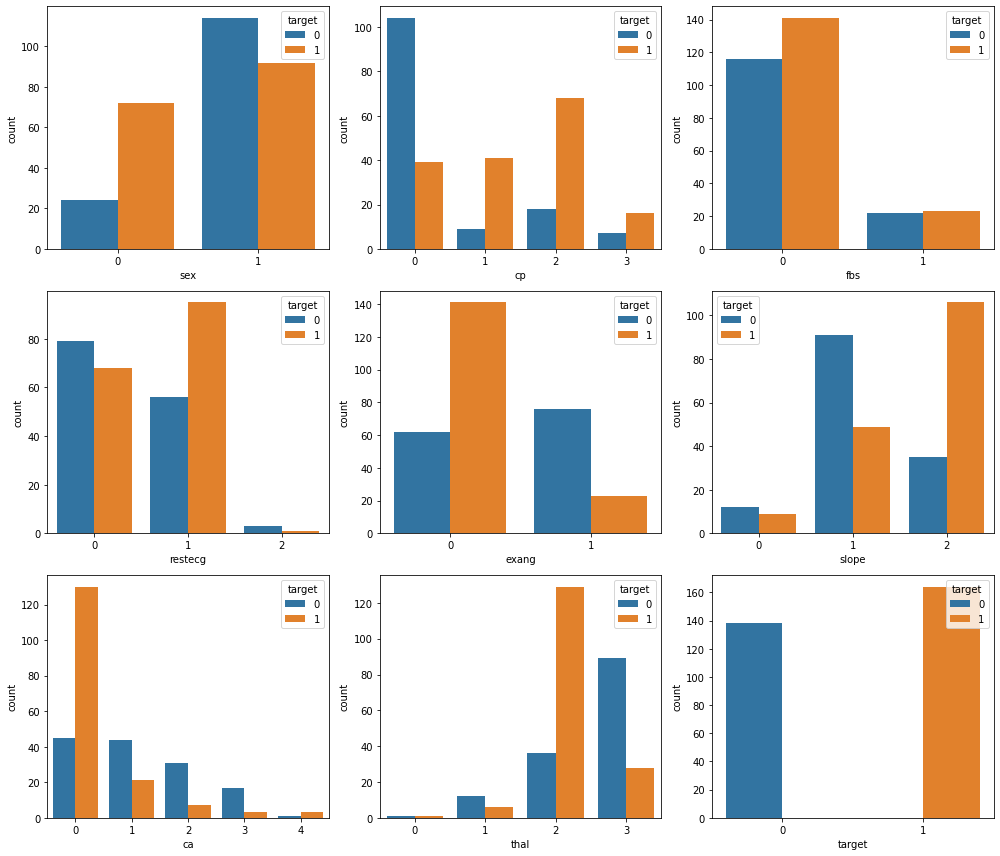

In [ ]:
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=data, x='sex', hue='target',ax=ax[0][0])
sns.countplot(data=data, x='cp', hue='target',ax=ax[0][1])
sns.countplot(data=data, x='fbs', hue='target',ax=ax[0][2])
sns.countplot(data=data, x='restecg', hue='target',ax=ax[1][0])
sns.countplot(data=data, x='exang', hue='target',ax=ax[1][1])
sns.countplot(data=data, x='slope', hue='target',ax=ax[1][2])
sns.countplot(data=data, x='ca', hue='target',ax=ax[2][0])
sns.countplot(data=data, x='thal', hue='target',ax=ax[2][1])
sns.countplot(data=data, x='target', hue='target',ax=ax[2][2])
plt.tight_layout()
plt.show()

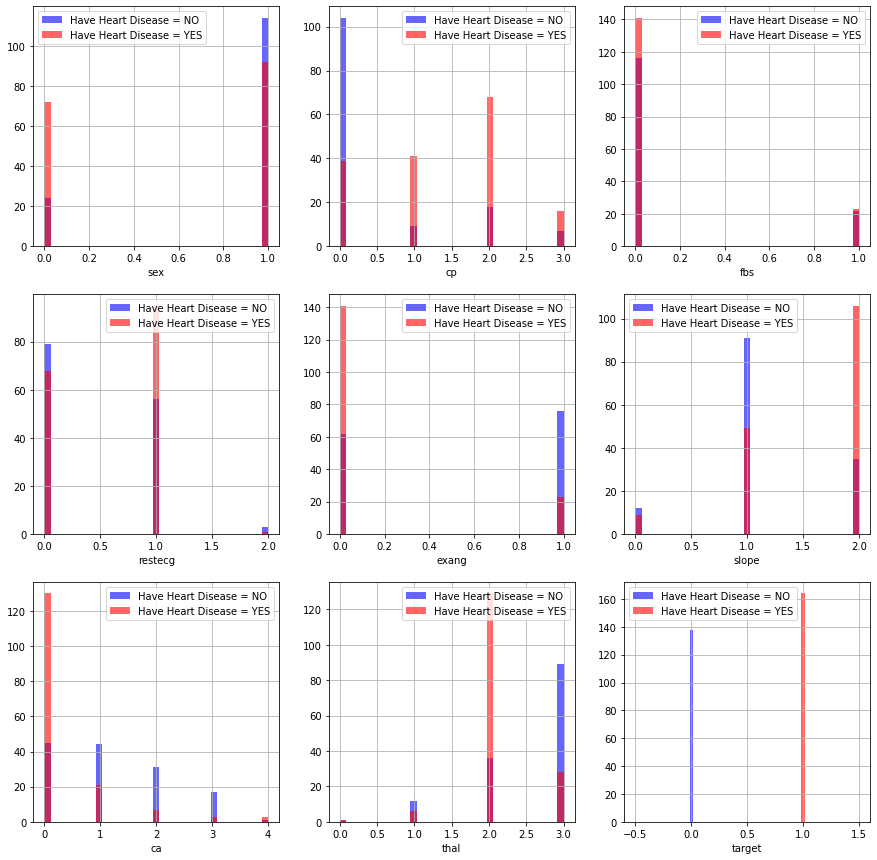

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**cp** {Chest Pain} 
* Orang dengan kategori **cp = 1, 2, 3** lebih memiliki kemungkinan untuk terkena penyakit jantung daripada orang dengan **cp = 0**.

**restecg** {resting electrocardiographic results}
* Orang dengan kategori **restcg = 1** (menandakan detak jantung tidak normal, dan dapat berkisar dari gejala ringan hingga masalah berat) lebih mungkin untuk memiliki penyakit jantung daripada kategori **restcg = 0**.

**exang** {exercise induced angina} : 
* Orang dengan kategori **exang = 0** (exercice induced angina = No) lebih mungkin untuk memiliki penyakit jantung daripada kategori **exang = 1** (exercice induced angina = Yes)

**slope** {the slope of the peak exercise ST segment} : .
* Orang dengan kategori **slope = 2** (Downslopins: tanda-tanda jantung tidak sehat) lebih mungkin untuk memiliki penyakit jantung daripada kategori **slope = 0** (Upsloping: detak jantung yang lebih baik dengan olahraga) atau **slope = 1** (Flatsloping: detak jantung normal atau tipikal jantung yang sehat))

**ca** {number of major vessels (0-3) colored by flourosopy} : 
* semakin banyak pergerakan darah semakin baik, sehingga orang dengan **ca = 0** lebih mungkin untuk memiliki penyakit jantung daripada kategori **ca = 1-4**

**thal** {thalium stress result} : 
* Orang dengan kategori thal = 2 (fixed defect: dulu terkena tapi sekarang sudah tidak) lebih mungkin untuk memiliki penyakit jantung daripada **thal = 1** atau **thal = 3**

#### Data Numerik (Kontinu)

In [ ]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
data_continous = data.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'], axis=1)
data_continous

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


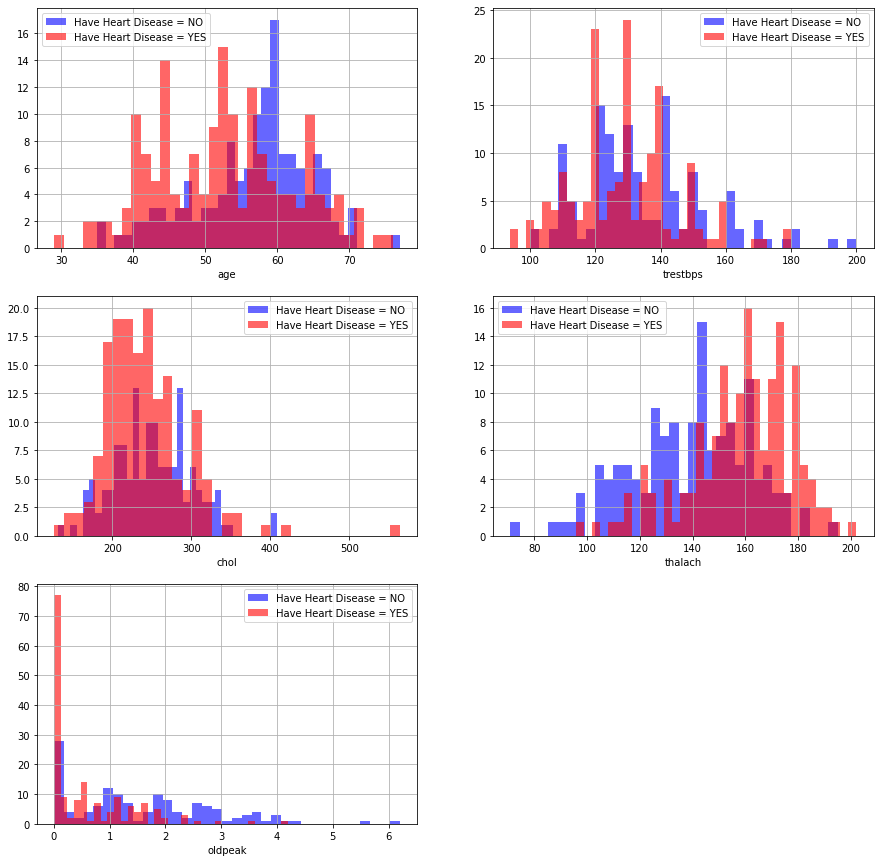

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

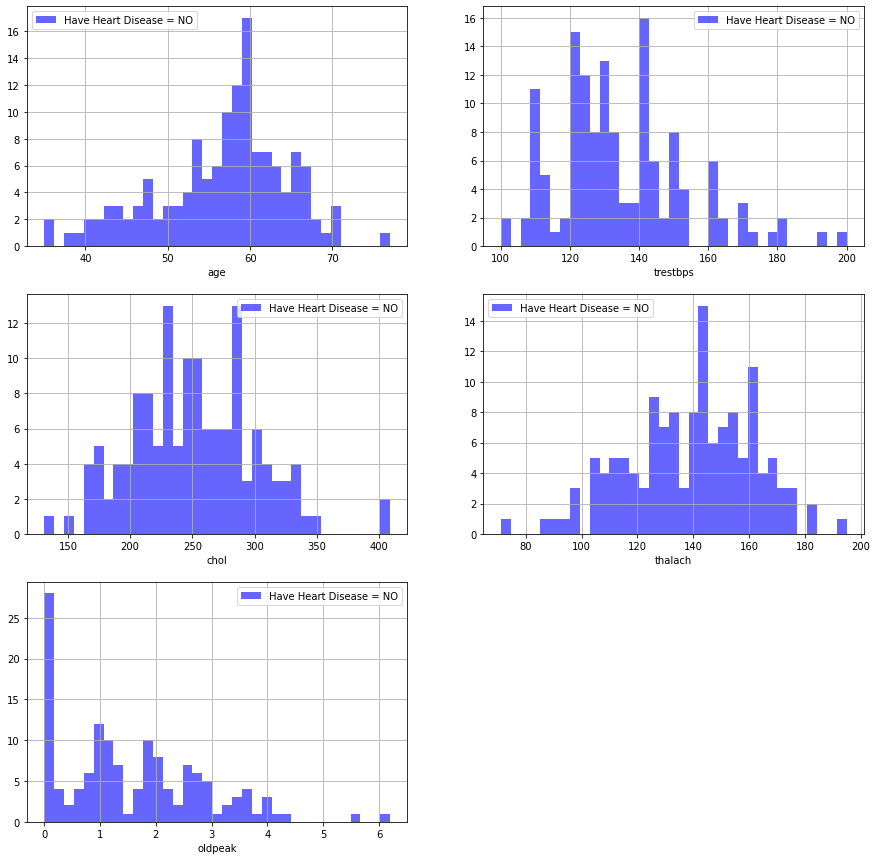

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

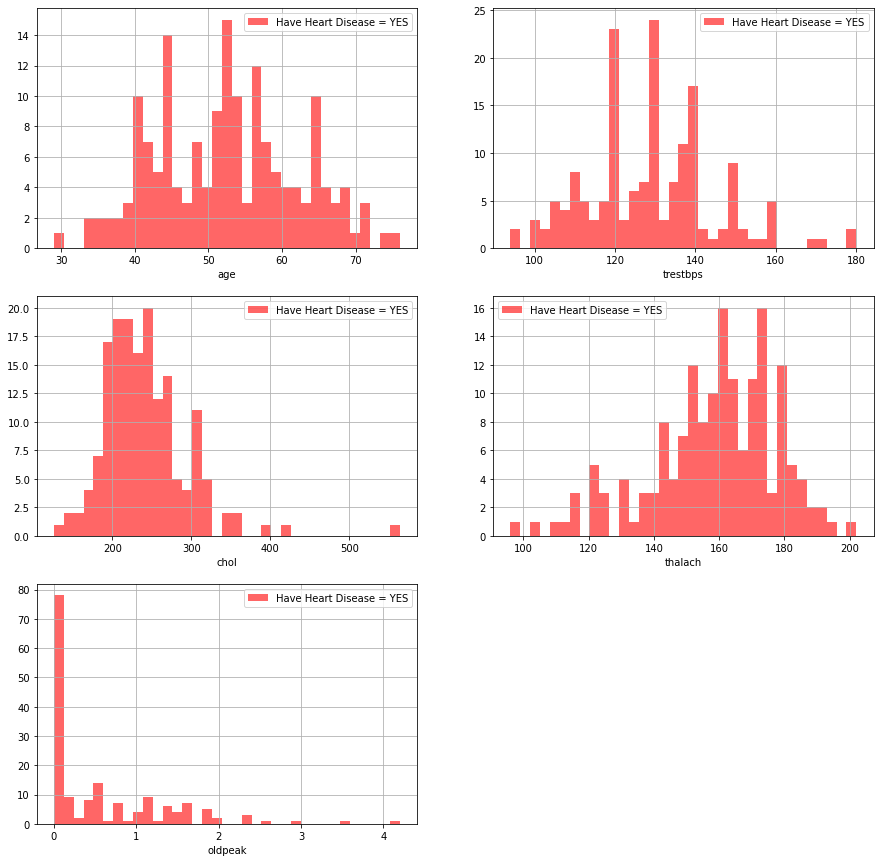

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**trestbps** : 
* resting blood pressure (in mm Hg on admission to the hospital) diatas 100 , terutama di rentang 120-140 berpengaruh terhadap kemungkinan terkena penyakit jantung.

**chol** {serum cholestoral in mg/dl} : 
* diatas 200 menjadi sebuah perhatian dalam kemungkinan terkena penyakit jantung.

**thalach** {maximum heart rate achieved} : 
* Orang dengan maximum heart rate >140 lebih mungkin untuk memiliki penyakit jantung.

**oldpeak** :
* depresi ST yang disebabkan oleh olahraga terlihat pada tekanan jantung / bagaimana kerja jantung dalam memompa darah dan oksigen selama latihan, maka jantung yang tidak sehat akan lebih tertekan.

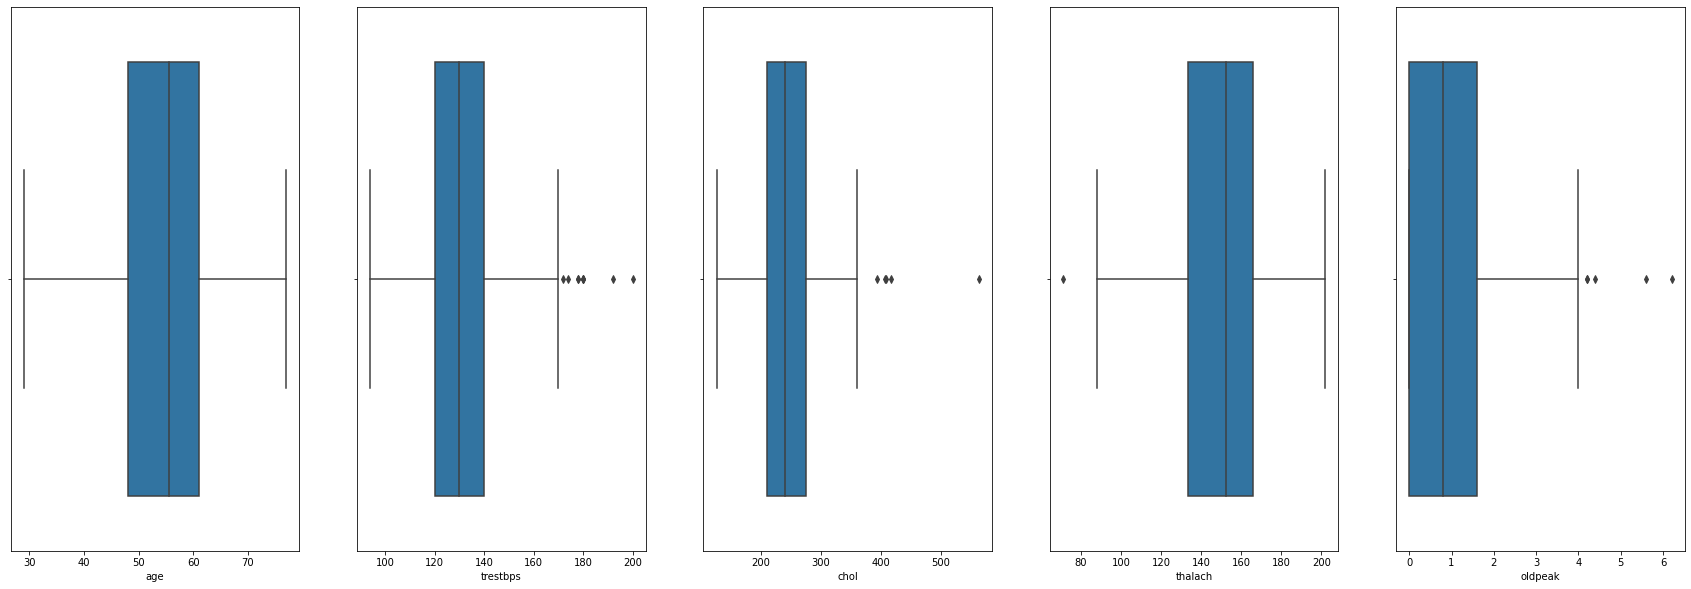

In [ ]:
#Menampilkan Outlier
outlier = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize = (30,10))

for i in enumerate(outlier):
  plt.subplot(1,5,i[0]+1)
  sns.boxplot(x = i[1], data=data)

Visualisasi **Age vs. Max Heart Rate for Heart Disease**



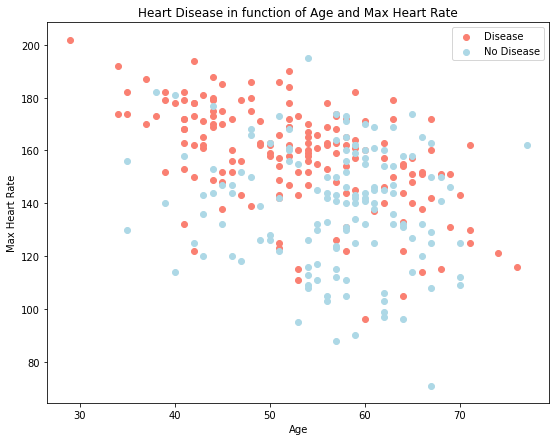

In [ ]:
plt.figure(figsize=(9, 7))

# Scatter dengan target 1 (Mengalami Penyakit Jantung)
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")

# Scatter dengan target 1 (Tidak Mengalami Penyakit Jantung)
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

Dapat dilihat bahwa penyakit jantung (Heart Disease) banyak diderita oleh orang yang berusia rentang 30-70+ tahun, secara visual dapat dilihat juga bahwa rentang usia 40-60 lebih rentan terkena penyakit jantung disertai dengan max heart rate yang tinggi.

###Correlation Matrix

(5.5, -0.5)

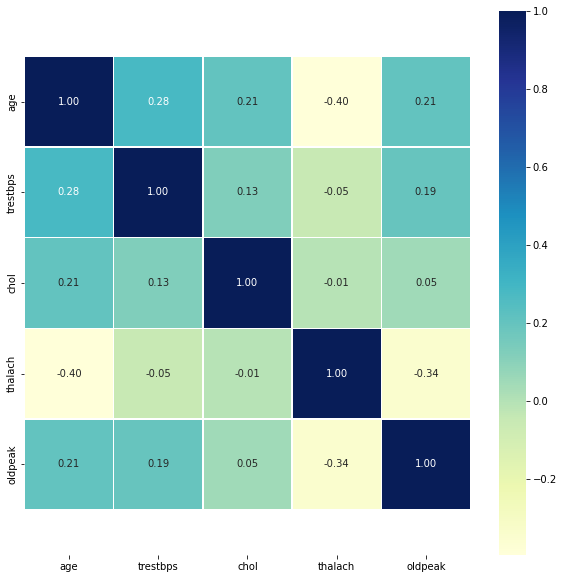

In [ ]:
corr_matrix = data_continous.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Correlation of Continous Features')

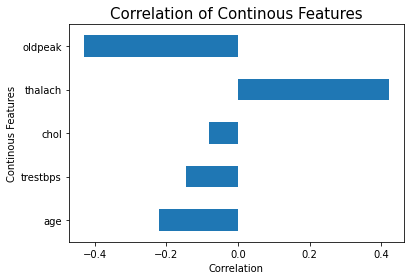

In [ ]:
data.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'], axis=1).corrwith(data.target).plot(kind='barh',width=0.5)
plt.xlabel('Correlation')
plt.ylabel('Continous Features');
plt.title('Correlation of Continous Features', fontsize=15)

#Data Prepocessing

## Membuat Variabel Dummy

In [ ]:
#Convert Categorical Variables into Dummy 
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


## Feature Scaling (StandarScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_scaled = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_scaled] = s_sc.fit_transform(dataset[col_scaled])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.value_counts()

1    115
0     96
Name: target, dtype: int64

In [ ]:
X_train.shape

(211, 30)

In [ ]:
y_train.shape

(211,)

In [ ]:
X_test.shape

(91, 30)

In [ ]:
y_test.shape

(91,)

##Mengatasi Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts()

1    115
0    115
Name: target, dtype: int64

#Data Modelling

**Mendefinisikan Program print_score**

In [ ]:
#Program print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
#Program cm_heatmap

def cm_heatmap(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        cm = confusion_matrix(y_train, pred)
        print(f"Confusion Matrix: \n {sns.heatmap(cm, annot=True)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        cm = confusion_matrix(y_test, pred)
        print(f"Confusion Matrix: \n {sns.heatmap(cm, annot=True)}\n")

##Tahap 1 (BEFORE SMOTE)

###Logistic Regression

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.78%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.866667    0.851240   0.85782    0.858953      0.858259
recall      0.812500    0.895652   0.85782    0.854076      0.857820
f1-score    0.838710    0.872881   0.85782    0.855796      0.857334
support    96.000000  115.000000   0.85782  211.000000    211.000000
_______________________________________________
Confusion Matrix: 
 [[ 78  18]
 [ 12 103]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.840909   0.893617  0.868132   0.867263      0.869290
recall      0.880952   0.857143  0.868132   0.869048      0.868132
f1-score    0.860465   0.875000  0.868132   0.867733      0.868292
support    42.000000  49.000000  0.868132  91.000000     91.000000
_____________

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



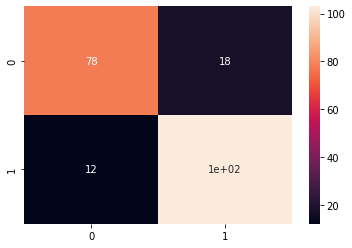

In [ ]:
#Confusion Matrix LR (Train)
cm_heatmap(lr_clf, X_train, y_train, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



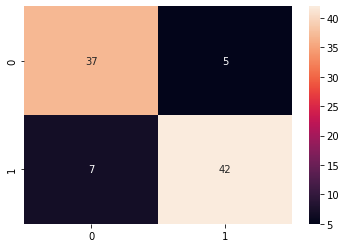

In [ ]:
#Confusion Matrix LR (Test)
cm_heatmap(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
lr_clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))



In [ ]:
print("Precision:",metrics.precision_score(y_test, pred))

Precision: 0.8936170212765957


In [ ]:
print("Precision:",metrics.recall_score(y_test, pred))

Precision: 0.8571428571428571


Summary #1

In [ ]:
test_score = (accuracy_score(y_test, lr_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train, lr_clf.predict(X_train))*100).round(2)

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.78,86.81


###Support Vector Machine (SVM) Classification

In [ ]:
#SVM
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', random_state=42, C=1)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.94%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.934066    0.908333  0.919431    0.921200      0.920041
recall      0.885417    0.947826  0.919431    0.916621      0.919431
f1-score    0.909091    0.927660  0.919431    0.918375      0.919211
support    96.000000  115.000000  0.919431  211.000000    211.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  11]
 [  6 109]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.840909   0.893617  0.868132   0.867263      0.869290
recall      0.880952   0.857143  0.868132   0.869048      0.868132
f1-score    0.860465   0.875000  0.868132   0.867733      0.868292
support    42.000000  49.000000  0.868132  91.000000     91.000000
_____________

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



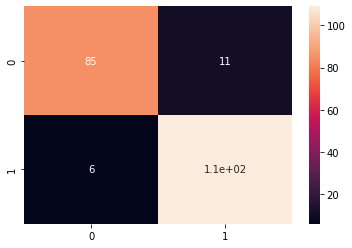

In [ ]:
#Confusion Matrix SVM (Train)
cm_heatmap(svm_clf, X_train, y_train, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



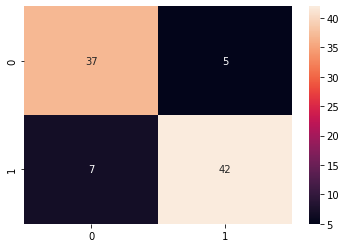

In [ ]:
#Confusion Matrix SVM (Test)
cm_heatmap(svm_clf, X_train, y_train, X_test, y_test, train=False)

Summary #2

In [ ]:
test_score = (accuracy_score(y_test, svm_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train, svm_clf.predict(X_train))*100).round(2)

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.78,86.81
1,Support Vector Machine,91.94,86.81


###Decision Tree Classifier

In [52]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    96.0  115.0       1.0      211.0         211.0
_______________________________________________
Confusion Matrix: 
 [[ 96   0]
 [  0 115]]

Test Result:
Accuracy Score: 80.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.785714   0.816327  0.802198    0.80102      0.802198
recall      0.785714   0.816327  0.802198    0.80102      0.802198
f1-score    0.785714   0.816327  0.802198    0.80102      0.802198
support    42.000000  49.000000  0.802198   91.00000     91.000000
_______________________________________________
Confusion Matrix: 


Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



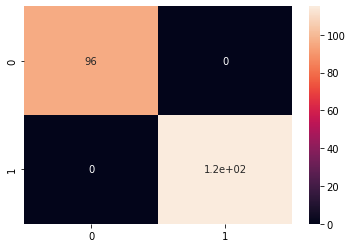

In [ ]:
#Confusion Matrix DTC (Train)
cm_heatmap(tree_clf, X_train, y_train, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



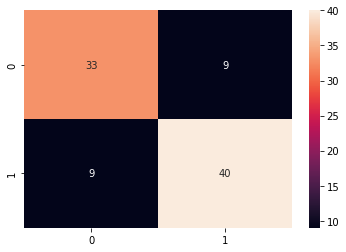

In [ ]:
#Confusion Matrix DTC (Test)
cm_heatmap(tree_clf, X_train, y_train, X_test, y_test, train=False)

Summary #3

In [ ]:
test_score = (accuracy_score(y_test, tree_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train, tree_clf.predict(X_train))*100).round(2)

results_df_3 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.78,86.81
1,Support Vector Machine,91.94,86.81
2,Decision Tree Classifier,100.00,80.22


### Summary #1

In [ ]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.78,86.81
1,Support Vector Machine,91.94,86.81
2,Decision Tree Classifier,100.00,80.22


##Hyperparameter Tuning (before smote)

###Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'C': 0.23357214690901212, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 85.31%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.865169    0.844262  0.853081    0.854715      0.853774
recall      0.802083    0.895652  0.853081    0.848868      0.853081
f1-score    0.832432    0.869198  0.853081    0.850815      0.852471
support    96.000000  115.000000  0.853081  211.000000    211.000000
_______________________________________________
Confusion Matrix: 
 [[ 77  19]
 [ 12 103]]

Test Result:
Accuracy Score: 89.01%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.863636   0.914894   0.89011   0.889265      0.891236
recall      0.904762   0.877551   0.89011   0.891156      0.890110
f1-score    0.88372

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



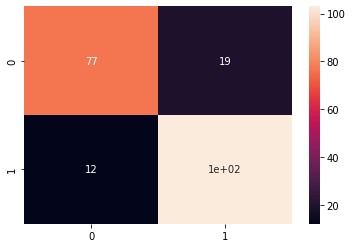

In [ ]:
#Confusion Matrix LR (Train)
cm_heatmap(lr_clf, X_train, y_train, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



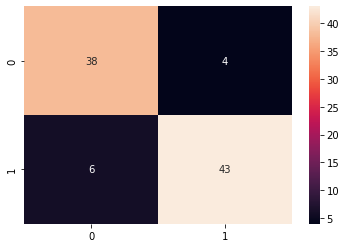

In [ ]:
#Confusion Matrix LR (Test)
cm_heatmap(lr_clf, X_train, y_train, X_test, y_test, train=False)

Summary of **Logistic Regression** Hyperparameter Tuning

In [ ]:
test_score = (accuracy_score(y_test, lr_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train, lr_clf.predict(X_train))*100).round(2)

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.31,89.01


###Support Vector Machine Hyperparameter Tuning

In [ ]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=3, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 147 candidates, totalling 441 fits
Best params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 85.78%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.866667    0.851240   0.85782    0.858953      0.858259
recall      0.812500    0.895652   0.85782    0.854076      0.857820
f1-score    0.838710    0.872881   0.85782    0.855796      0.857334
support    96.000000  115.000000   0.85782  211.000000    211.000000
_______________________________________________
Confusion Matrix: 
 [[ 78  18]
 [ 12 103]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.860465   0.895833  0.879121   0.878149      0.879510
recall      0.880952   0.877551  0.879121   0.879252      0.879121
f1-score    0.870588   0.88659

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



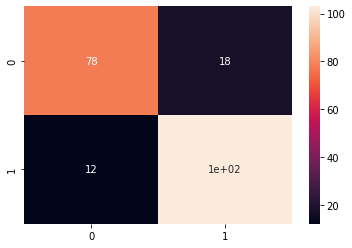

In [ ]:
#Confusion Matrix SVM (Train)
cm_heatmap(svm_clf, X_train, y_train, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



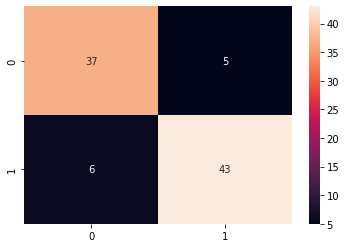

In [ ]:
#Confusion Matrix SVM (Test)
cm_heatmap(svm_clf, X_train, y_train, X_test, y_test, train=False)

Summary until **Support Vectore Machine** Hyperparameter Tuning

In [ ]:
test_score = (accuracy_score(y_test, svm_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train, svm_clf.predict(X_train))*100).round(2)

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.31,89.01
1,Tuned Support Vector Machine,85.78,87.91


###Decision Tree Classifier Hyperparameter Tuning

In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 85.31%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.835052    0.868421  0.853081    0.851736      0.853239
recall      0.843750    0.860870  0.853081    0.852310      0.853081
f1-score    0.839378    0.864629  0.853081    0.852004      0.853140
support    96.000000  115.000000  0.853081  211.000000    211.000000
_______________________________________________
Confusion Matrix: 
 [[81 15]
 [16 99]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.714286   0.833333  0.769231   0.773810      0.778388
recall      0.833333   0.714286 

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



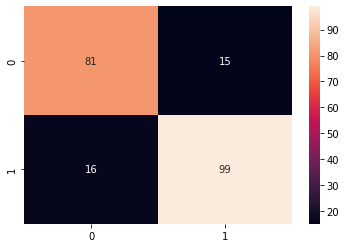

In [ ]:
#Confusion Matrix DTC (Train)
cm_heatmap(tree_clf, X_train, y_train, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



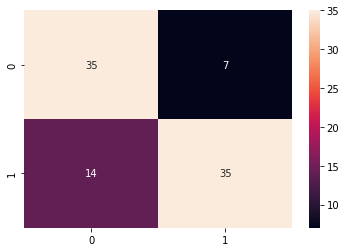

In [ ]:
#Confusion Matrix DTC (Test)
cm_heatmap(tree_clf, X_train, y_train, X_test, y_test, train=False)

Summary until **Decision Tree Classifier** Hyperparameter Tuning

In [ ]:
test_score = (accuracy_score(y_test, tree_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train, tree_clf.predict(X_train))*100).round(2)

results_df_3 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_3, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.31,89.01
1,Tuned Support Vector Machine,85.78,87.91
2,Tuned Decision Tree Classifier,85.31,76.92


##Summary

In [ ]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.78,86.81
1,Support Vector Machine,91.94,86.81
2,Decision Tree Classifier,100.00,80.22


In [ ]:
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.31,89.01
1,Tuned Support Vector Machine,85.78,87.91
2,Tuned Decision Tree Classifier,85.31,76.92


Berdasarkan analisis yang telah dilakukan, didapatkan accuracy_score jika dibandingkan setelah dilakukan hyperparameter tuning, nilai accuracy_score mengalami penurunan dan 

di contoh ini kebetulan kalo pake PCA accuracy nya justru turun, karena jumlah fitur awalnya masih sedikit. tapi ketika jumlah fiturnya cukup banyak, dan ada noise, biasanya pake PCA akan membantu meningkatkan akurasi. setidaknya kita sudah belajar bagaimana cara mengaplikasikan PCA dalam modelling

##Tahap 2 (AFTER SMOTE)

In [ ]:
#Program print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score_sm(clf, X_train_sm, y_train_sm, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train_sm)
        clf_report = pd.DataFrame(classification_report(y_train_sm, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_sm, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_sm, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
#Program cm_heatmap_sm

def cm_heatmap_sm(clf, X_train_sm, y_train_sm, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train_sm)
        clf_report = pd.DataFrame(classification_report(y_train_sm, pred, output_dict=True))
        cm = confusion_matrix(y_train_sm, pred)
        print(f"Confusion Matrix: \n {sns.heatmap(cm, annot=True)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        cm = confusion_matrix(y_test, pred)
        print(f"Confusion Matrix: \n {sns.heatmap(cm, annot=True)}\n")

###Logistic Regression

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_sm, y_train_sm)

print_score_sm(lr_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)
print_score_sm(lr_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.872727    0.841667  0.856522    0.857197      0.857197
recall       0.834783    0.878261  0.856522    0.856522      0.856522
f1-score     0.853333    0.859574  0.856522    0.856454      0.856454
support    115.000000  115.000000  0.856522  230.000000    230.000000
_______________________________________________
Confusion Matrix: 
 [[ 96  19]
 [ 14 101]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.844444   0.913043  0.879121   0.878744      0.881382
recall      0.904762   0.857143  0.879121   0.880952      0.879121
f1-score    0.873563   0.884211  0.879121   0.878887      0.879296
support    42.000000  49.000000  0.879121  91.000000     91.000000
________

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



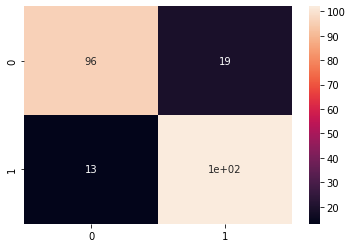

In [ ]:
#Confusion Matrix LR (Train)
cm_heatmap_sm(lr_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



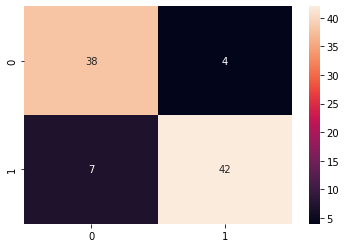

In [ ]:
#Confusion Matrix LR (Test)
cm_heatmap_sm(lr_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

In [ ]:
#Summary 1
test_score = (accuracy_score(y_test, lr_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train_sm, lr_clf.predict(X_train_sm))*100).round(2)

results_df_sm = pd.DataFrame(data=[["Logistic Regression (SMOTE)", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression (SMOTE),86.09,87.91


###Support Vector Machine (SVM) Classification

In [44]:
#SVM
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', random_state=42, C=1)
svm_clf.fit(X_train_sm, y_train_sm)

print_score_sm(svm_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)
print_score_sm(svm_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.936937    0.907563  0.921739    0.922250      0.922250
recall       0.904348    0.939130  0.921739    0.921739      0.921739
f1-score     0.920354    0.923077  0.921739    0.921715      0.921715
support    115.000000  115.000000  0.921739  230.000000    230.000000
_______________________________________________
Confusion Matrix: 
 [[104  11]
 [  7 108]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.822222   0.891304  0.857143   0.856763      0.859420
recall      0.880952   0.836735  0.857143   0.858844      0.857143
f1-score    0.850575   0.863158  0.857143   0.856866      0.857350
support    42.000000  49.000000  0.857143  91.000000     91.000000
________

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



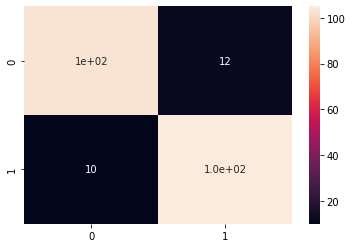

In [ ]:
#Confusion Matrix SVM (Train)
cm_heatmap_sm(svm_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



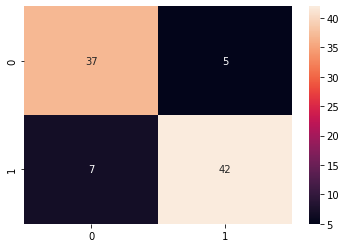

In [ ]:
#Confusion Matrix SVM (Test)
cm_heatmap_sm(svm_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Summary #2

In [ ]:
#Summary 2
test_score = (accuracy_score(y_test, svm_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train_sm, svm_clf.predict(X_train_sm))*100).round(2)

results_df_sm2 = pd.DataFrame(data=[["Support Vector Machine (SMOTE)", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df_sm = results_df_sm.append(results_df_sm2, ignore_index=True)
results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression (SMOTE),86.09,87.91
1,Support Vector Machine (SMOTE),90.43,86.81


###Decision Tree Classifier

In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_sm, y_train_sm)

print_score_sm(tree_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)
print_score_sm(tree_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    115.0  115.0       1.0      230.0         230.0
_______________________________________________
Confusion Matrix: 
 [[115   0]
 [  0 115]]

Test Result:
Accuracy Score: 73.63%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.687500   0.790698  0.736264   0.739099      0.743068
recall      0.785714   0.693878  0.736264   0.739796      0.736264
f1-score    0.733333   0.739130  0.736264   0.736232      0.736455
support    42.000000  49.000000  0.736264  91.000000     91.000000
_______________________________________________
Confusion Matr

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



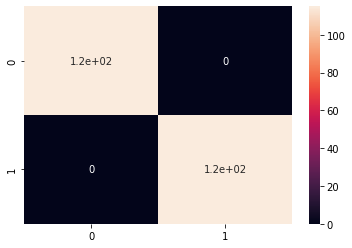

In [ ]:
#Confusion Matrix DTC (Train)
cm_heatmap_sm(tree_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



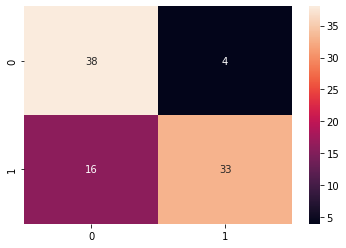

In [ ]:
#Confusion Matrix DTC (Test)
cm_heatmap_sm(tree_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

###Summary #2

In [ ]:
test_score = (accuracy_score(y_test, tree_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train_sm, tree_clf.predict(X_train_sm))*100).round(2)

results_df_sm3 = pd.DataFrame(data=[["Decision Tree Classifier (SMOTE)", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df_sm = results_df_sm.append(results_df_sm3, ignore_index=True)
results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression (SMOTE),86.09,87.91
1,Support Vector Machine (SMOTE),90.43,86.81
2,Decision Tree Classifier (SMOTE),100.00,78.02


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


model_lr = lr_clf.fit(X_train_sm, y_train_sm)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = tree_clf.fit(X_train_sm, y_train_sm)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_svm = svm_clf.fit(X_train_sm, y_train_sm)
probs_svm = model_svm.predict_proba(X_test)[:, 1]

AttributeError: ignored

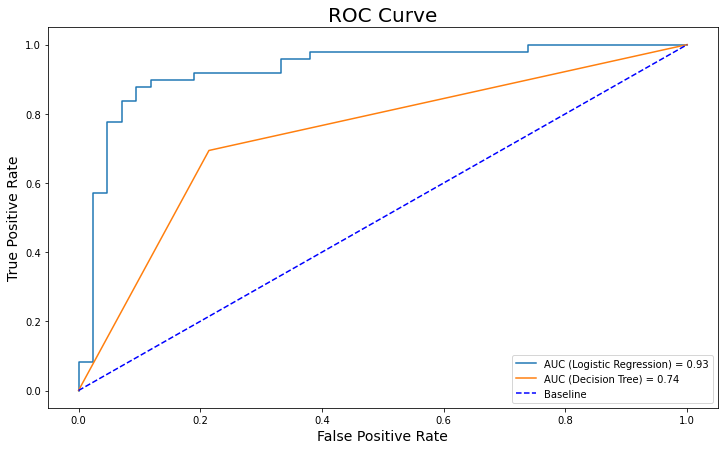

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_dt = roc_auc_score(y_test, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

Summary #2

In [ ]:
results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression (SMOTE),86.09,87.91
1,Support Vector Machine (SMOTE),90.43,86.81
2,Decision Tree Classifier (SMOTE),100.00,78.02


##Hyperparameter Tuning (after smote)

###Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
lr_cv.fit(X_train_sm, y_train_sm)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train_sm, y_train_sm)

print_score_sm(lr_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)
print_score_sm(lr_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'C': 1.623776739188721, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 87.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.884956    0.871795  0.878261    0.878375      0.878375
recall       0.869565    0.886957  0.878261    0.878261      0.878261
f1-score     0.877193    0.879310  0.878261    0.878252      0.878252
support    115.000000  115.000000  0.878261  230.000000    230.000000
_______________________________________________
Confusion Matrix: 
 [[100  15]
 [ 13 102]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.844444   0.913043  0.879121   0.878744      0.881382
recall      0.904762   0.857143  0.879121   0.880952      0.879121
f1-score    0.87

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



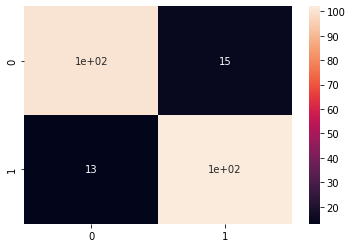

In [ ]:
#Confusion Matrix LR (Train)
cm_heatmap_sm(lr_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



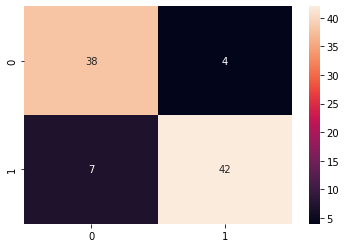

In [ ]:
#Confusion Matrix LR (Test)
cm_heatmap_sm(lr_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Summary of **Logistic Regression** Hyperparameter Tuning

In [ ]:
test_score = (accuracy_score(y_test, lr_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train_sm, lr_clf.predict(X_train_sm))*100).round(2)

tuning_results_df_sm = pd.DataFrame(data=[["Tuned Logistic Regression (SMOTE)", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression (SMOTE),87.83,87.91


###Support Vector Machine Hyperparameter Tuning

In [ ]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=3, verbose=1, scoring="accuracy")
svm_cv.fit(X_train_sm, y_train_sm)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train_sm, y_train_sm)

print_score_sm(svm_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)
print_score_sm(svm_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Fitting 3 folds for each of 147 candidates, totalling 441 fits
Best params: {'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 89.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.895652    0.895652  0.895652    0.895652      0.895652
recall       0.895652    0.895652  0.895652    0.895652      0.895652
f1-score     0.895652    0.895652  0.895652    0.895652      0.895652
support    115.000000  115.000000  0.895652  230.000000    230.000000
_______________________________________________
Confusion Matrix: 
 [[103  12]
 [ 12 103]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.826087   0.911111  0.868132   0.868599      0.871869
recall      0.904762   0.836735  0.868132   0.870748      0.868132
f1-score    0.863636   0

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



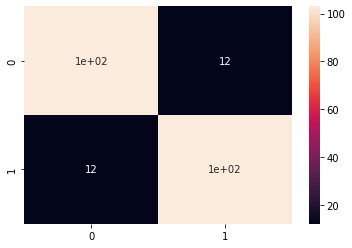

In [ ]:
#Confusion Matrix SVM (Train)
cm_heatmap_sm(svm_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



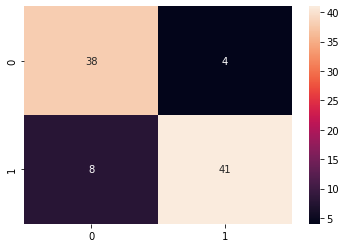

In [ ]:
#Confusion Matrix SVM (Test)
cm_heatmap_sm(svm_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Summary until **Support Vectore Machine** Hyperparameter Tuning

In [ ]:
test_score = (accuracy_score(y_test, svm_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train_sm, svm_clf.predict(X_train_sm))*100).round(2)

tuning_results_df_sm2 = pd.DataFrame(data=[["Tuned Support Vectore Machine (SMOTE)", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

tuning_results_df_sm = tuning_results_df_sm.append(tuning_results_df_sm2 , ignore_index=True)
tuning_results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression (SMOTE),87.83,87.91
1,Tuned Support Vectore Machine (SMOTE),89.57,86.81


###Decision Tree Classifier Hyperparameter Tuning

In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train_sm, y_train_sm)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train_sm, y_train_sm)

print_score_sm(tree_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)
print_score_sm(tree_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 89.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894737    0.887931  0.891304    0.891334      0.891334
recall       0.886957    0.895652  0.891304    0.891304      0.891304
f1-score     0.890830    0.891775  0.891304    0.891302      0.891302
support    115.000000  115.000000  0.891304  230.000000    230.000000
_______________________________________________
Confusion Matrix: 
 [[102  13]
 [ 12 103]]

Test Result:
Accuracy Score: 75.82%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1  accuracy  macro avg  weighted avg
precision   0.738095   0.77551  0.758242   0.756803      0.758242
recall      0.738095   0.

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



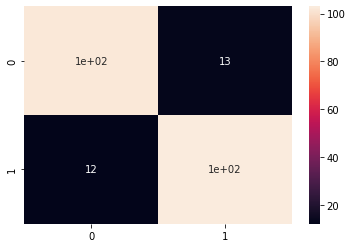

In [ ]:
#Confusion Matrix DTC (Train)
cm_heatmap_sm(tree_clf, X_train_sm, y_train_sm, X_test, y_test, train=True)

Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



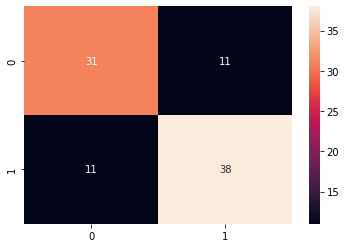

In [ ]:
#Confusion Matrix DTC (Test)
cm_heatmap_sm(tree_clf, X_train_sm, y_train_sm, X_test, y_test, train=False)

Summary until **Decision Tree Classifier** Hyperparameter Tuning

In [ ]:
test_score = (accuracy_score(y_test, tree_clf.predict(X_test))*100).round(2)
train_score = (accuracy_score(y_train_sm, tree_clf.predict(X_train_sm))*100).round(2)

tuning_results_df_sm3 = pd.DataFrame(data=[["Tuned Decision Tree Classifier (SMOTE)", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

tuning_results_df_sm = tuning_results_df_sm.append(tuning_results_df_sm3 , ignore_index=True)
tuning_results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression (SMOTE),87.83,87.91
1,Tuned Support Vectore Machine (SMOTE),89.57,86.81
2,Tuned Decision Tree Classifier (SMOTE),89.13,75.82


##Summary

In [ ]:
results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression (SMOTE),86.09,87.91
1,Support Vector Machine (SMOTE),90.43,86.81
2,Decision Tree Classifier (SMOTE),100.00,78.02


In [ ]:
tuning_results_df_sm

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression (SMOTE),87.83,87.91
1,Tuned Support Vectore Machine (SMOTE),89.57,86.81
2,Tuned Decision Tree Classifier (SMOTE),89.13,75.82
